In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5_regular_season
from triple_agent.classes.scl_set import sort_games_into_sets
from triple_agent.reports.specific.scl_set_scores import scl_set_scores_categorize
import matplotlib.pyplot as plt

In [4]:
scl5_replays = get_parsed_replays(select_scl5_regular_season)

In [5]:
scl5_sets = sort_games_into_sets(scl5_replays)

In [6]:
scores = [(6,6),(7,5),(7,4),(7,3),(7,2),(7,1),(7,0)]
compliant_scl5_sets = list(filter(lambda s: tuple(sorted(s.score, reverse=True)) in scores and s.division != 'Challenger', scl5_sets))

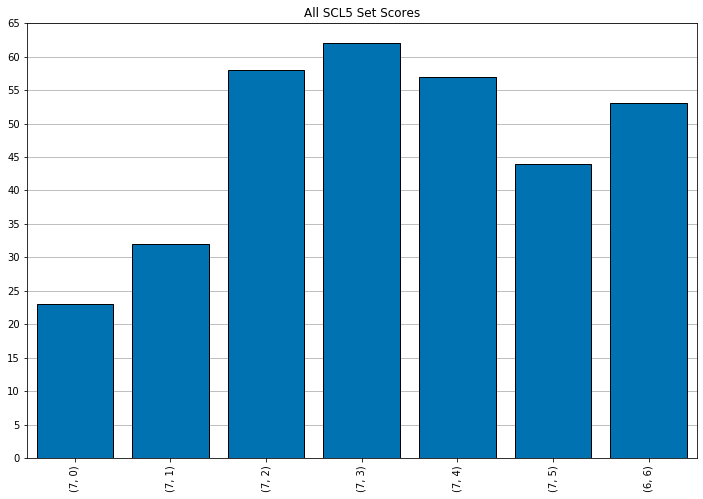

7                       6
      0   1   2   3   4   5   6
NaN  23  32  58  62  57  44  53

In [7]:
scl_set_scores_categorize(
    compliant_scl5_sets,
    data_query=DataQueryProperties(primary_order=lambda name_series: (name_series[0][1], name_series[0][0])),
    axis_properties=AxisProperties(title='All SCL5 Set Scores', force_bar=True)
).frame

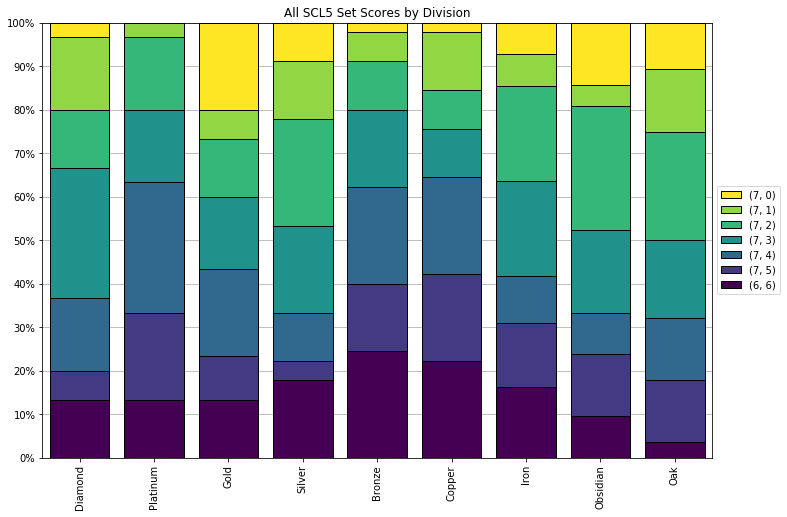

,Diamond,Platinum,Gold,Silver,Bronze,Copper,Iron,Obsidian,Oak
"(7, 0)",0.033333,0.000000,0.200000,0.088889,0.022222,0.022222,0.072727,0.142857,0.107143
"(7, 1)",0.166667,0.033333,0.066667,0.133333,0.066667,0.133333,0.072727,0.047619,0.142857
"(7, 2)",0.133333,0.166667,0.133333,0.244444,0.111111,0.088889,0.218182,0.285714,0.250000
"(7, 3)",0.300000,0.166667,0.166667,0.200000,0.177778,0.111111,0.218182,0.190476,0.178571
"(7, 4)",0.166667,0.300000,0.200000,0.111111,0.222222,0.222222,0.109091,0.095238,0.142857
"(7, 5)",0.066667,0.200000,0.100000,0.044444,0.155556,0.200000,0.145455,0.142857,0.142857
"(6, 6)",0.133333,0.133333,0.133333,0.177778,0.244444,0.222222,0.163636,0.095238,0.035714


In [8]:
cmap = plt.get_cmap('viridis', len(scores))

color_dict = {score:cmap(i) for i,score in enumerate(scores)}

scl_set_scores_categorize(
    compliant_scl5_sets,
    data_query=DataQueryProperties(
        groupby=lambda s: s.division,
        primary_order = scores,
        reverse_primary_order=True,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True
    ),
    axis_properties=AxisProperties(
        title='All SCL5 Set Scores by Division',
        primary_color_dict = color_dict,
    )
).frame